# EDA Final Project

<li> Get an initial sniff: shape, columns information and type, missing values</li>
<li> Initial clean-up: tailor the data, check extreme values, pick features of interest </li>
<li> Explore the categorical features</li>
<li> Explore the numeric features</li>
<li> More advanced: explore string, list, and text features; create more features that help with the exploration, injecting external information </li>
<li> Explore deeper: relationships between features and the target variable, grouping records by features</li>


# EDA

### 1. Initial Look

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
nba = pd.read_excel('NBA_Stats_71_Years_Updated.xlsx')

In [90]:
# Shape
nba.shape

(33330, 31)

In [93]:
# Columns and Types
nba.dtypes

Rank                    int64
Year                   object
Season Start Year       int64
Season Type            object
Player ID               int64
Player                 object
Team ID                 int64
Team                   object
Games Played            int64
Minutes Played          int64
FG Made                 int64
FG Attempts             int64
FG %                  float64
3-Pt FG Made          float64
3-Pt FG Attempts      float64
3-Pt FG %             float64
FT Made                 int64
FT Attempts             int64
FT %                  float64
Offensive Rebounds    float64
Defensive Rebounds    float64
Rebounds                int64
Assists                 int64
Steals                float64
Blocks                float64
Turnovers             float64
Personal Fouls          int64
Points Scored           int64
Efficency               int64
AST/TOV               float64
STL/TOV               float64
dtype: object

In [102]:
# Columns with NAs
list(nba.columns[nba.isnull().any() == True])

['3-Pt FG Made',
 '3-Pt FG Attempts',
 '3-Pt FG %',
 'Offensive Rebounds',
 'Defensive Rebounds',
 'Steals',
 'Blocks',
 'Turnovers',
 'AST/TOV',
 'STL/TOV']

### 2. Initial Clean Up

In [ ]:
# Change Data Types

# nba['Player ID'] = nba['Player ID'].astype('O')

# nba = nba.drop(columns=['Year', 'AST/TOV', 'STL/TOV','3-Pt FG %','FG %'])

In [ ]:
# Playoffs vs Regular
# Not necessarily what we should focus on for a high-level overview of the data

# nba_playoffs = nba[nba['Season Type']=='Playoffs'].copy()
# nba_playoffs = nba_playoffs.drop(columns='Season Type')

# nba_regular = nba[nba['Season Type']=='Regular Season'].copy()
# nba_regular = nba_regular.drop(columns = 'Season Type')

In [111]:
nba['decade'] = (nba['Season Start Year']//10)*10  # new col for decade of each record

In [113]:
nba['decade'] = nba['decade'].astype('category') # encode it

In [156]:
nba_by_decade  = nba.groupby('decade').mean()  # group by decade and drop irrelevant cols for new data frame

nba_by_decade = nba_by_decade.drop(columns=['Rank','Season Start Year', 'Player ID', 'Team ID'])

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_29877/2018556959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_by_decade  = nba.groupby('decade').mean()


/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_29877/1236566623.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+list(nba_by_decade.index), font='Times',fontsize=13)


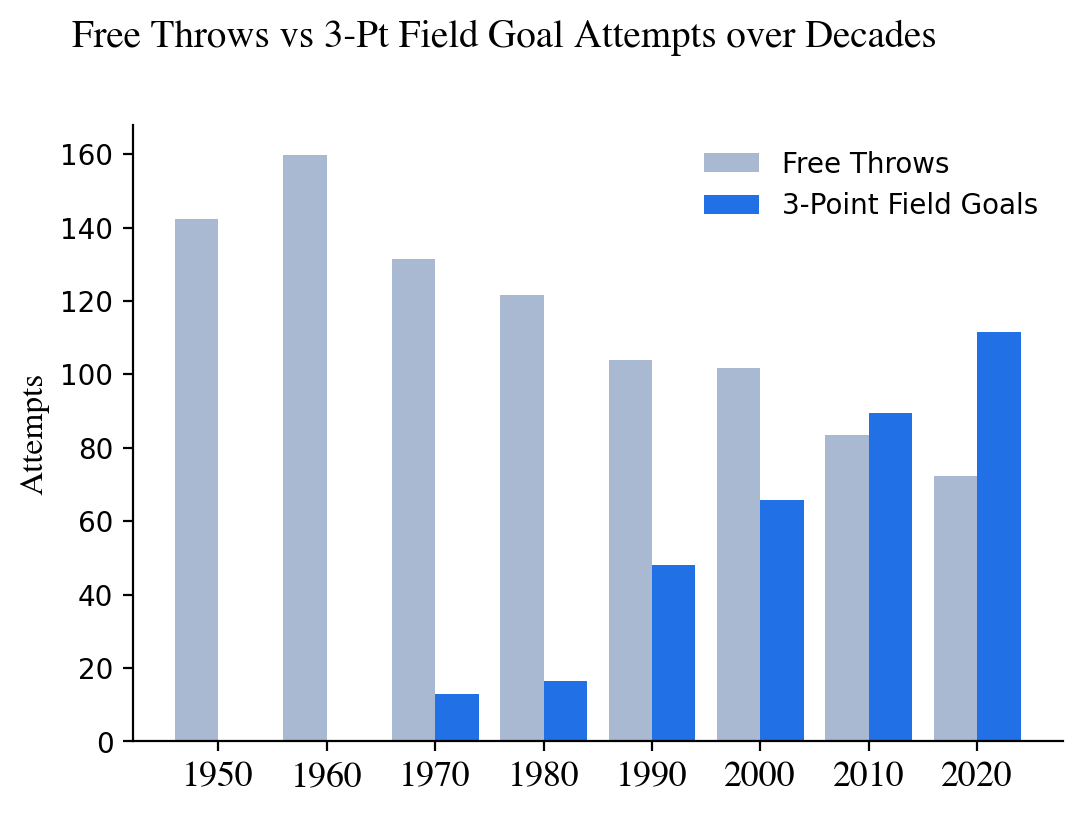

In [252]:
fix,ax= plt.subplots(figsize=(6,4))

w=3
ax.bar(np.array(nba_by_decade.index) -2, nba_by_decade['FT Attempts'], width = 4, color='#a9b9d1', label='Free Throws')
ax.bar(np.array(nba_by_decade.index)+2, nba_by_decade['3-Pt FG Attempts'], width=4, color = '#2270e6', label='3-Point Field Goals')
ax.set_xticklabels([0]+list(nba_by_decade.index), font='Times',fontsize=13)
ax.set_ylabel("Attempts",font='Times',fontsize=12)
ax.set_title('Free Throw vs 3-Pt Field Goal Attempts over Decades',font='Times',fontsize=14, x=.4, y=1.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False) # use labels from bar() calls
plt.show()

/var/folders/fh/5d__cjxd4sz4gl3sczjn84800000gn/T/ipykernel_29877/3716974073.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+list(nba_by_decade.index), font='Times',fontsize=13)


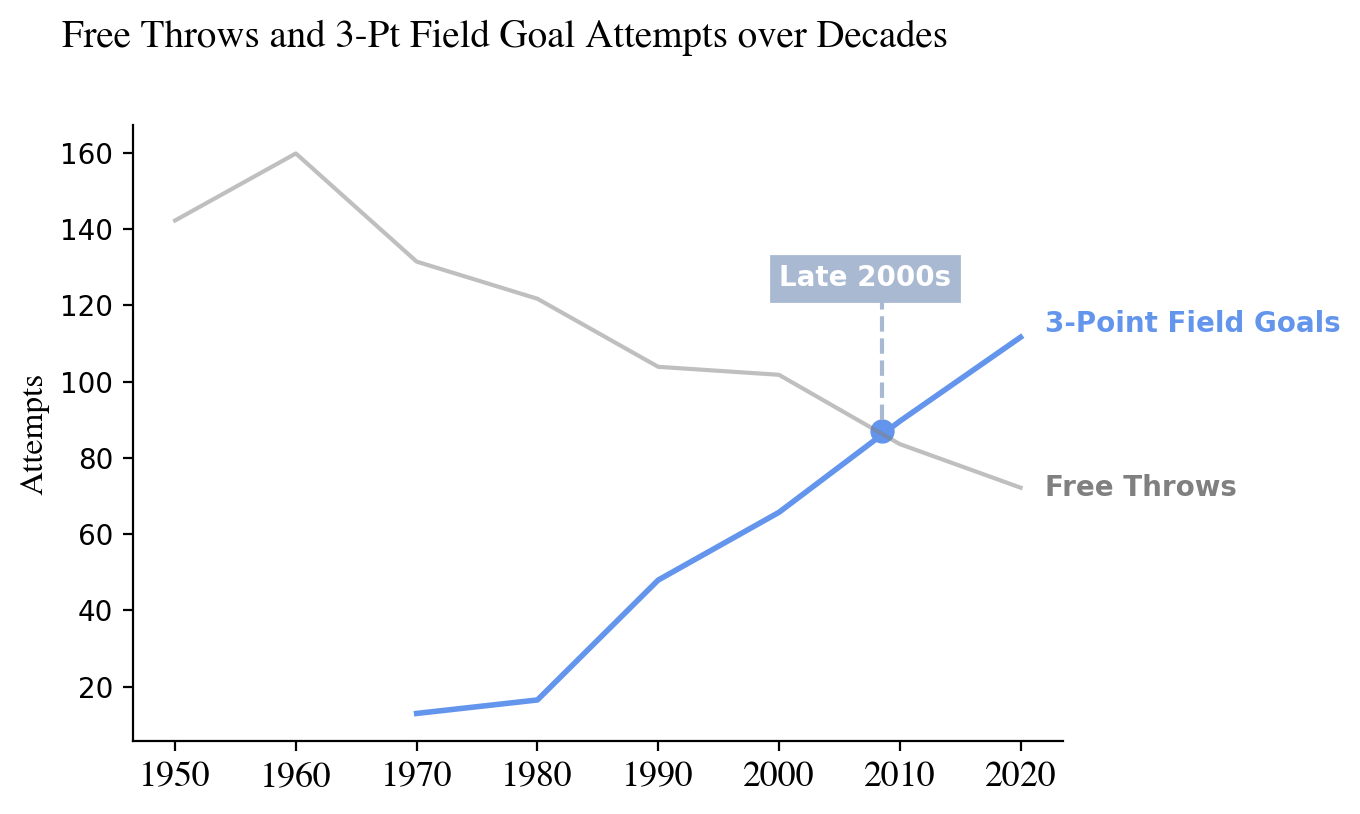

In [283]:
fig,ax = plt.subplots(figsize=(6,4))



ax.plot(nba_by_decade['3-Pt FG Attempts'],label='3-Pointers',c='cornflowerblue',lw=2)

ax.plot(nba_by_decade['FT Attempts'],label='Free Throws',color='grey',alpha=.5)

ax.set_xticklabels([0]+list(nba_by_decade.index), font='Times',fontsize=13)
ax.set_ylabel("Attempts",font='Times',fontsize=12)
# ax.set_xlabel("Decades",font='Times',fontsize=13,loc='left')
ax.set_title('Free Throws and 3-Pt Field Goal Attempts over Decades',font='Times',fontsize=14, x=.4, y=1.1)

ax.text(2022,113, '3-Point Field Goals', c='cornflowerblue',weight='bold')
ax.text(2022,70, 'Free Throws', c='grey',weight='bold')

ax.text(2000,125,'Late 2000s',c='white',weight='bold',bbox=dict(boxstyle = "square",edgecolor='#a9b9d1',
                  facecolor = "#a9b9d1"))

# plt.legend(loc='upper right',bbox_to_anchor=(1.3,1),frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.scatter(2008.5,87,c='cornflowerblue',s=60)

ax.vlines(x=2008.5,ymin=90,ymax=123,colors='#a9b9d1',linestyles='dashed')
plt.show()

In [392]:
# Past decade of data
nba_since_2013 = nba[nba['Season Start Year']>=2013]

In [350]:
# Top-Ranked Players since 2013

rank_1_since_2013 = nba_since_2013[nba_since_2013['Rank']==1]
rank_1_since_2013.describe()

,Rank,Season Start Year,Player ID,Team ID,Games Played,Minutes Played,FG Made,FG Attempts,FG %,3-Pt FG Made,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
count,20.0,20.000000,2.000000e+01,2.000000e+01,20.000000,20.00000,20.000000,20.000000,20.000000,20.0000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.0,2017.500000,3.762719e+05,1.610613e+09,48.950000,1819.80000,486.900000,1034.000000,0.483600,146.2000,...,367.100000,349.950000,71.700000,33.500000,195.850000,118.800000,1489.550000,1499.600000,1.739500,0.380000
std,0.0,2.946898,5.456618e+05,8.106365e+00,28.761222,1023.13227,276.494389,614.234483,0.053298,115.7791,...,214.688979,259.915467,50.128362,20.231554,136.082125,71.768341,903.441576,889.647086,0.415774,0.090438
min,1.0,2013.000000,2.544000e+03,1.610613e+09,18.000000,744.00000,194.000000,359.000000,0.417000,13.0000,...,88.000000,54.000000,19.000000,7.000000,47.000000,41.000000,563.000000,446.000000,1.040000,0.240000
25%,1.0,2015.000000,2.011420e+05,1.610613e+09,21.000000,836.75000,224.500000,449.500000,0.441500,42.0000,...,203.000000,132.750000,28.250000,20.750000,72.000000,56.000000,600.750000,675.000000,1.502500,0.315000
50%,1.0,2017.500000,2.019350e+05,1.610613e+09,43.500000,1567.50000,461.000000,954.500000,0.463000,123.5000,...,276.500000,270.000000,56.000000,25.000000,156.500000,95.500000,1381.500000,1335.500000,1.675000,0.365000
75%,1.0,2020.000000,2.031838e+05,1.610613e+09,78.750000,2818.25000,715.000000,1564.250000,0.539750,233.7500,...,505.250000,570.250000,118.250000,52.750000,311.250000,178.000000,2272.000000,2235.250000,1.985000,0.427500
max,1.0,2022.000000,1.629027e+06,1.610613e+09,82.000000,3125.00000,857.000000,1941.000000,0.571000,378.0000,...,864.000000,840.000000,158.000000,71.000000,438.000000,244.000000,2818.000000,2740.000000,2.710000,0.550000


In [395]:
plt.scatter(nba_since_2013['Points Scored'],nba_since_2013[''])


In [ ]:
# Recent data grouped by year then team
nba_gr = nba_since_2013.groupby(['Season Start Year','Team']).mean()

_______________________

- __Overview of Player Performance__: Analyze metrics like points scored, minutes played, field goal percentage, free throw percentage, rebounds, assists, and efficiency for players across all seasons.

- __Player Rankings__: Investigate the top players based on points scored or other key metrics and explore their performance over the years.

- __Team Performance__: Explore team-wise statistics and identify teams that have been successful over the years.

- __Trends Over Time__: Analyze how certain metrics have changed over the 71-year period. Cab observe trends in points scored, field goal percentage, or other performance indicators.

- __Player Comparison__: Compare the performance of specific players or groups of players using visualizations like bar charts, line plots, or scatter plots.

- __Data Quality__: Check for missing values, duplicates, or any other data quality issues that may affect  analysis.
